In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/Users/dexter/Training/data.csv')

In [4]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [5]:
df.shape

(1159764, 20)

##### The unnamed column is useless. So, removing it.

In [6]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [15]:
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [17]:
df=df.sample(800000)
df.shape

(800000, 19)

In [14]:
#save data file to parquet with compression
df.to_parquet('/Users/dexter/Training/spotify_data_insights/data.parquet',compression='gzip')
#compress more
# df.to_parquet('/Users/dexter/Training/spotify_data_insights/data.parquet',engine='fastparquet',compression='gzip')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159749 non-null  object 
 1   track_name        1159763 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 16  

In [12]:
df.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00
max,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


#### **Choosing popularity as the target variable, the aim is to train a model that will be able to predict the poplularity of tracks based on available features.**

##### Dropping unnecessary columns that are not needed for training

In [13]:
df.drop('track_id',axis=1,inplace=True)
df.drop('artist_name',axis=1,inplace=True)
df.drop('track_name',axis=1,inplace=True)
df.drop('mode',axis=1,inplace=True)
df.drop('time_signature',axis=1,inplace=True)

In [14]:
df.head()

,popularity,year,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,68,2012,acoustic,0.483,0.303,4,-10.058,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166
1,50,2012,acoustic,0.572,0.454,3,-10.286,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387
2,57,2012,acoustic,0.409,0.234,3,-13.711,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960
3,58,2012,acoustic,0.392,0.251,10,-9.845,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293
4,54,2012,acoustic,0.430,0.791,6,-5.419,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320


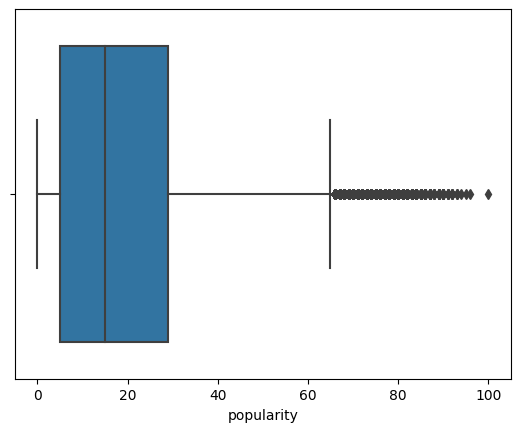

In [14]:
#Boxplot
import seaborn as sns
sns.boxplot(data=df,x='popularity')
plt.show(sns)   

##### Do we exclude these outliers? are they important or necessary for the right prediction? If yes, how?

In [15]:
np.where(df['popularity']>60)

(array([      0,    1770,    1771, ..., 1152518, 1154596, 1156574]),)

##### Choosing a label encoder to convert the categorical column 'genre' to better fit our model.

In [16]:
#Performing label encoding on genre column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['genre']=le.fit_transform(df['genre'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   popularity        1159764 non-null  int64  
 1   year              1159764 non-null  int64  
 2   genre             1159764 non-null  int64  
 3   danceability      1159764 non-null  float64
 4   energy            1159764 non-null  float64
 5   key               1159764 non-null  int64  
 6   loudness          1159764 non-null  float64
 7   speechiness       1159764 non-null  float64
 8   acousticness      1159764 non-null  float64
 9   instrumentalness  1159764 non-null  float64
 10  liveness          1159764 non-null  float64
 11  valence           1159764 non-null  float64
 12  tempo             1159764 non-null  float64
 13  duration_ms       1159764 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 123.9 MB


In [21]:
#research on this
a=df.corr()
a['popularity'].sort_values(ascending=False)

popularity          1.000000
year                0.345821
loudness            0.104097
danceability        0.098533
energy              0.009401
tempo               0.002566
key                 0.000390
valence            -0.018070
speechiness        -0.024700
liveness           -0.056968
acousticness       -0.059181
genre              -0.093009
duration_ms        -0.118484
instrumentalness   -0.152893
Name: popularity, dtype: float64

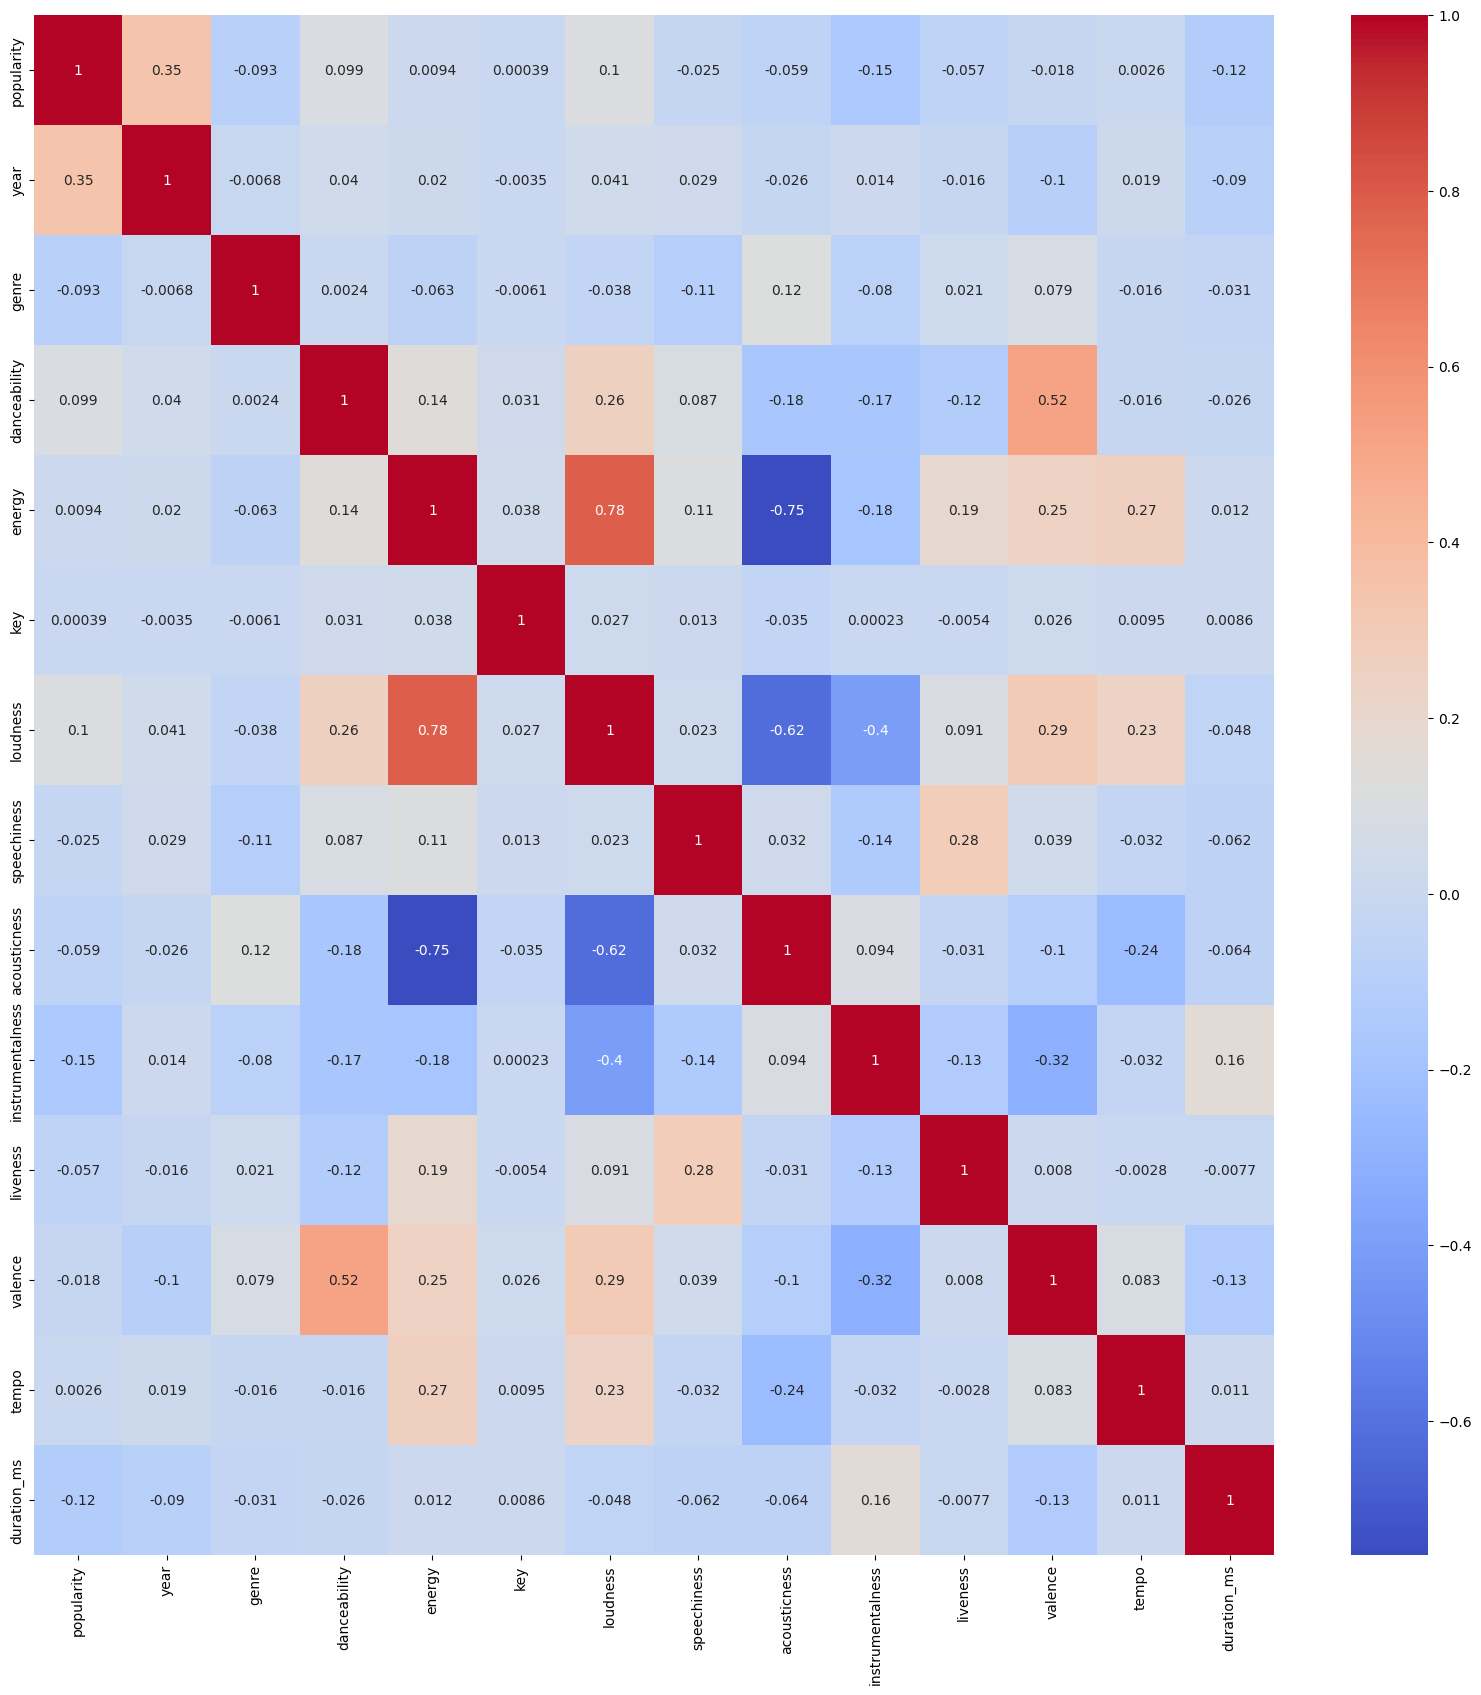

In [22]:
#plotting correlation matrix heatmap
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show(sns)

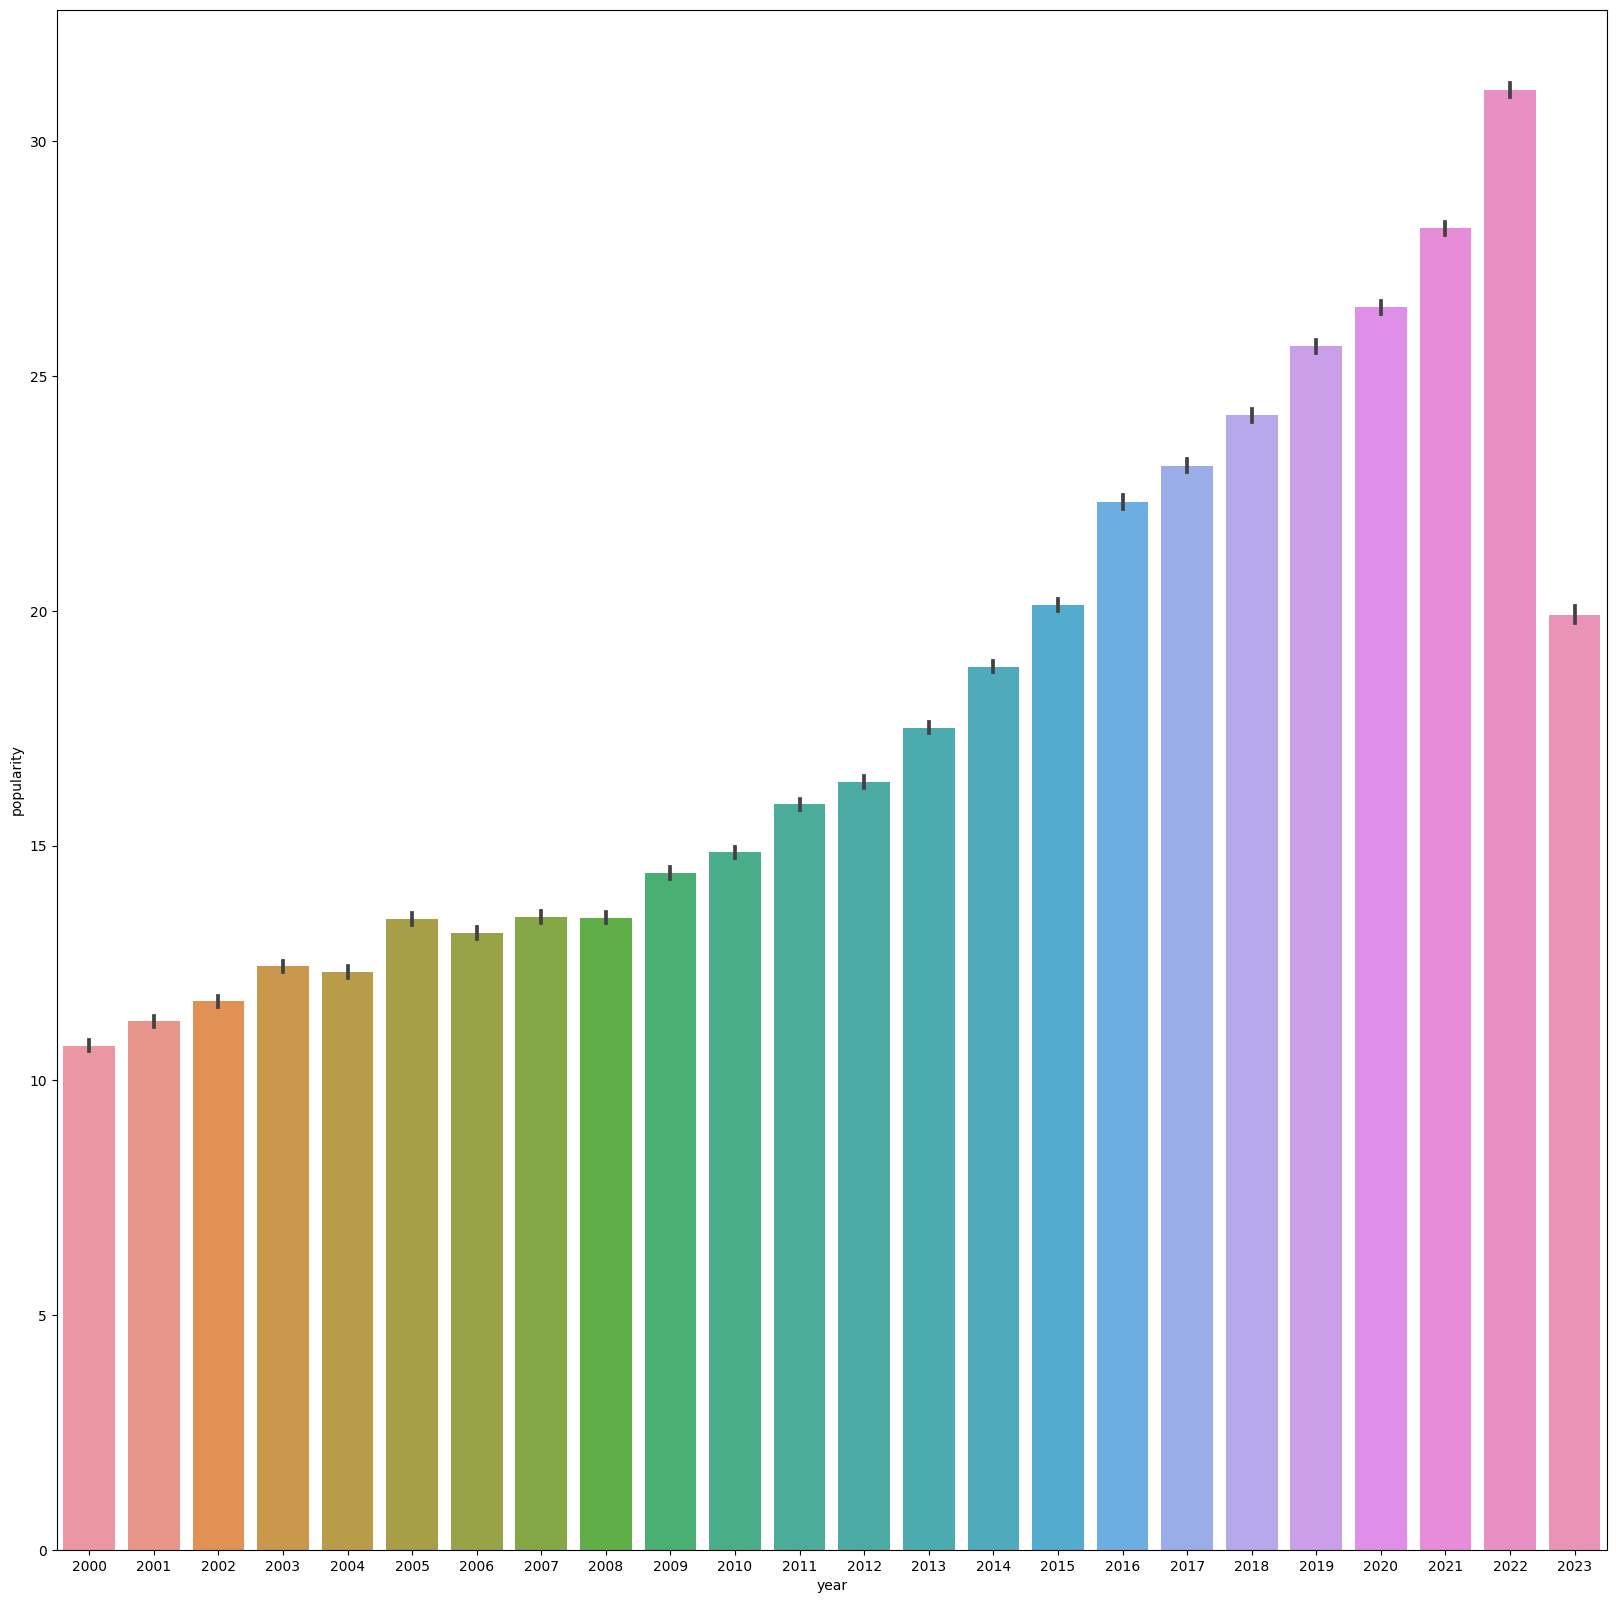

In [24]:
#barplot for poplularity increasing every year
plt.figure(figsize=(20,20))
sns.barplot(x='year',y='popularity',data=df)
plt.show(sns)

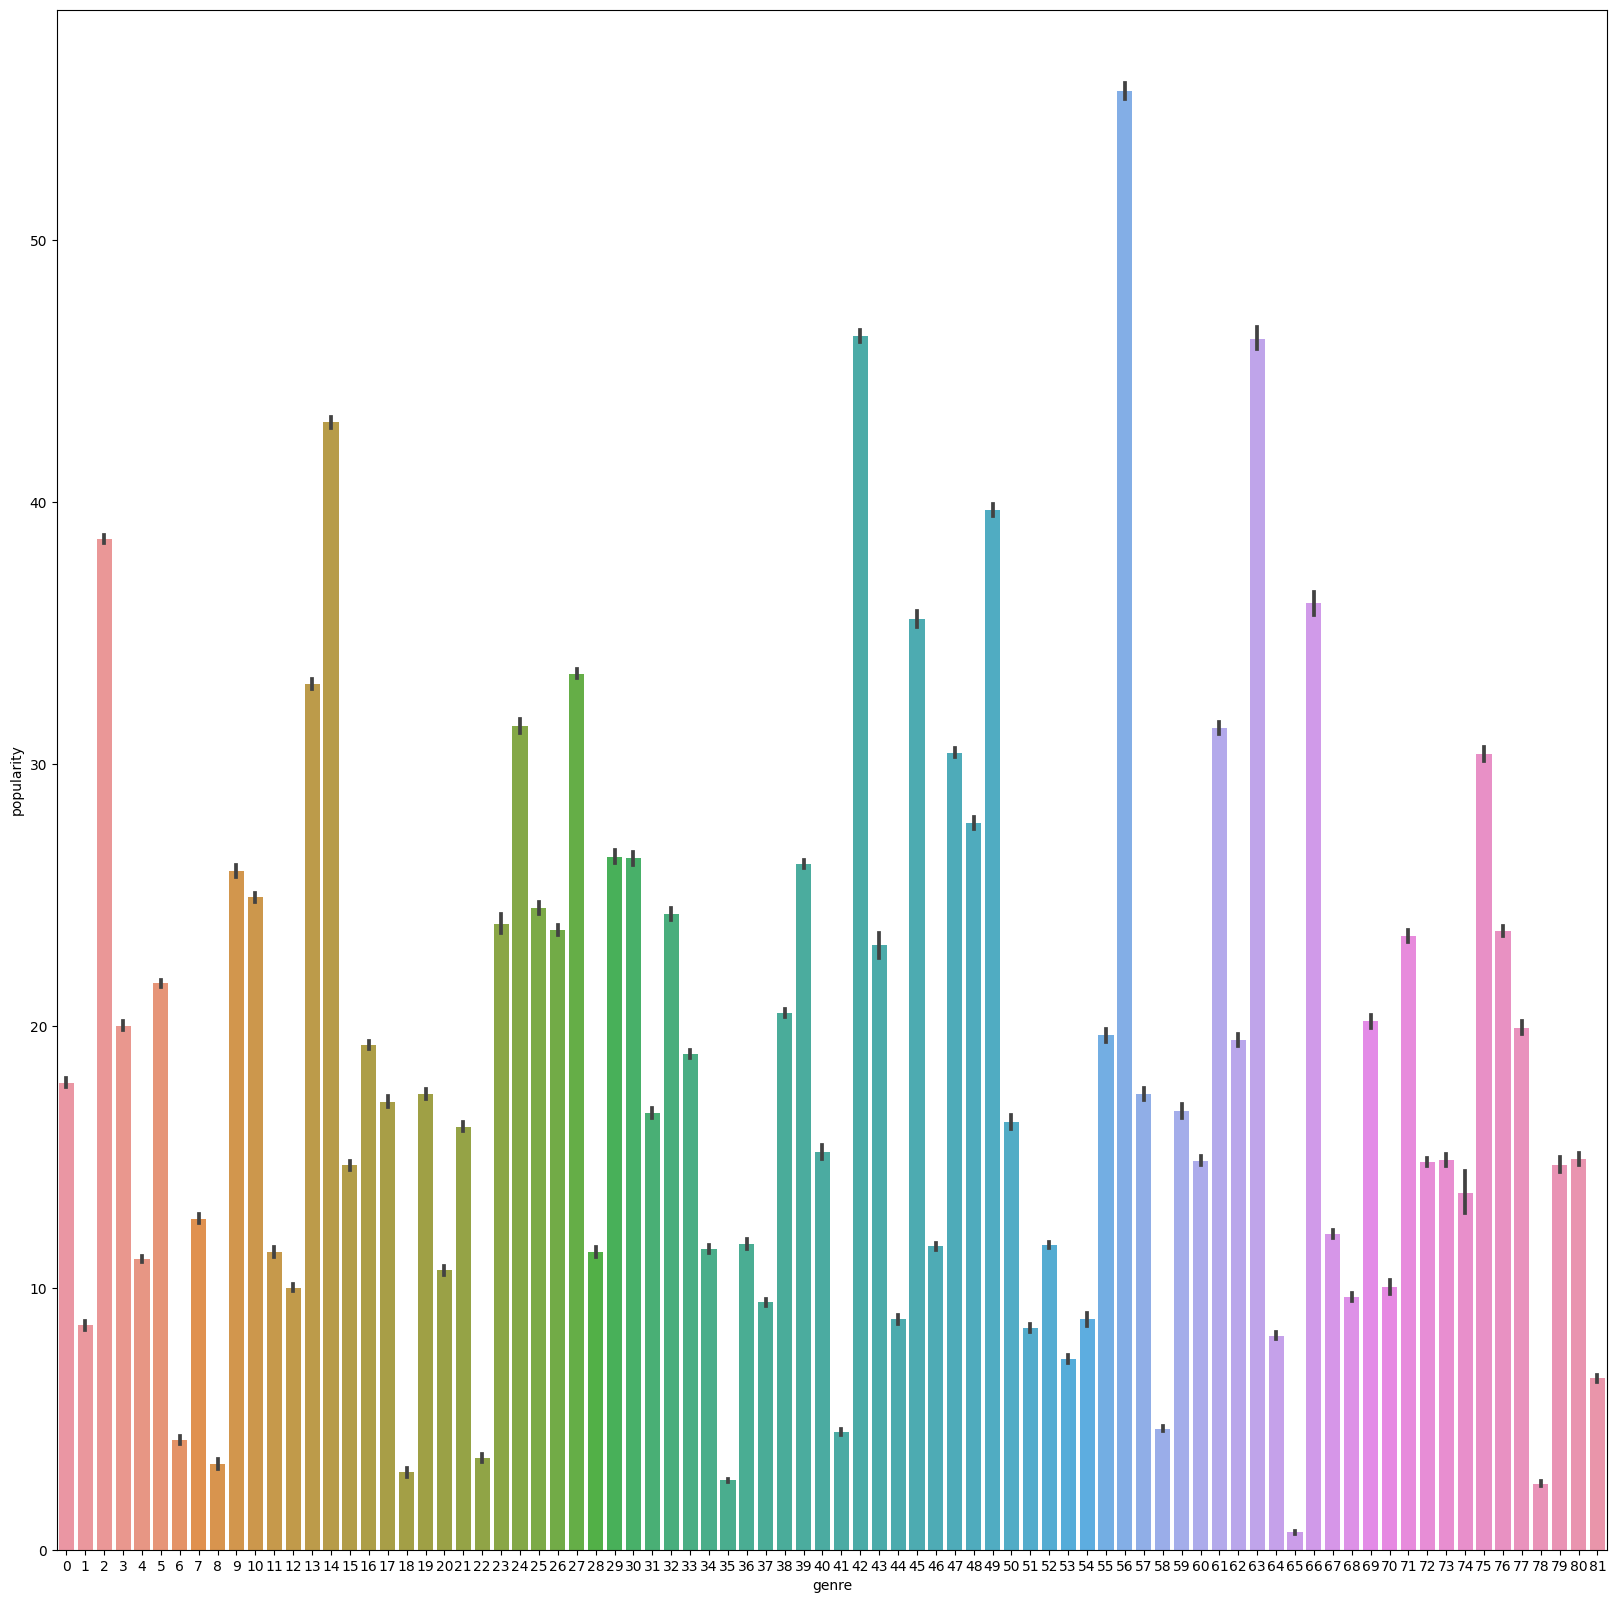

In [25]:
plt.figure(figsize=(20,20))
sns.barplot(x='genre',y='popularity',data=df)
plt.show(sns)

In [17]:
df.head()

,popularity,year,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,68,2012,0,0.483,0.303,4,-10.058,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166
1,50,2012,0,0.572,0.454,3,-10.286,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387
2,57,2012,0,0.409,0.234,3,-13.711,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960
3,58,2012,0,0.392,0.251,10,-9.845,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293
4,54,2012,0,0.430,0.791,6,-5.419,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320


In [18]:
df['popularity'].max()

100

##### Splitting the data into train and test split of 80% and 20%

In [19]:
#performing a train test split with popularity as the target variable
from sklearn.model_selection import train_test_split
X=df.drop('popularity',axis=1)
y=df['popularity']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### **Training a Linear Regression model ⬇**

In [20]:
#Training a linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

#Predicting the popularity of the songs
y_pred=lr.predict(X_test)

#Evaluating the model
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))

#RMSE for the linear regression model
print('Root Mean Squared Error:',mean_squared_error(y_test,y_pred,squared=False))

Mean Squared Error: 207.3487564491382
Root Mean Squared Error: 14.399609593636148


##### The model is not performing well as the mean squared error is very high

### **Training a Decision Tree Model ⬇**

In [21]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

y_pred2=dt.predict(X_test)

#Evaluating the model
from sklearn.metrics import mean_squared_error

print('Mean Squared Error:',mean_squared_error(y_test,y_pred2))

#RMSE for the decision tree model
print('Root Mean Squared Error:',mean_squared_error(y_test,y_pred2,squared=False))

Mean Squared Error: 168.25333811841355
Root Mean Squared Error: 12.97125044544332


##### The decision tree model has a lower mean squared error than the linear regression model.
##### This means that the decision tree model is a better fit for the data than the linear regression model.
##### However, the rmse of 13 implies that the model is predicting 13 units away from the actual value.

### **Training a Random forest model ⬇**

In [24]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

y_pred3=rf.predict(X_test)

#Evaluating the model
from sklearn.metrics import mean_squared_error

print('Mean Squared Error:',mean_squared_error(y_test,y_pred3))
print('Root Mean Squared Error:',mean_squared_error(y_test,y_pred3,squared=False))

Mean Squared Error: 83.71955946382278
Root Mean Squared Error: 9.149839313552057


##### The random forest model is performing better than the others

#### **Checking the RMSE of the training data**

In [22]:
y_pred_train=dt.predict(X_train)
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train,y_pred_train)))

Root Mean Squared Error: 0.40969427136886605


##### The RMSE of the training set is less than the RMSE of the test set, which means that the model is overfitting

In [25]:
#average value of the target variable
df['popularity'].mean()

18.38312277325387

##### Then again the mean of the target variable is 18.383 which is more than the RMSE of the random forest regressor model. So, can we say that the model is not overfitting?